In [ ]:
#import important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import scipy.stats as stats
import seaborn as sns
import numpy as np
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
%matplotlib inline




In [2]:
#create dataframe and perform initial data inspection

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Question 1: What are the most important features when looking for a home?
# How many null values are found

In [5]:
print(df.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [ ]:
#Drop columns with null values, plus longitude/latitude, 
#and the columns that reference other lots instead of the house itself. 

In [6]:
df = df.drop(['waterfront', 'view', 'yr_built','yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],axis=1)

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,0.0,98178
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1991.0,98125
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,NaN,98028
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,0.0,98136
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,0.0,98074


In [9]:
#Question 2: What are the most correlated datasets with price?
#look at a heatmap of the data to see if there are any potentially correlated values

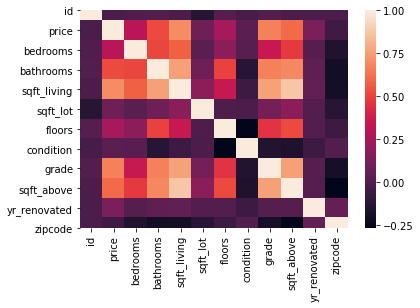

In [10]:
corr = df.corr()
sns.heatmap(corr);

In [11]:
# it looks like sqft_living, bathrooms, bedrooms, and grade are the most correlated with price.
# clean up the presentation to be more certain. 

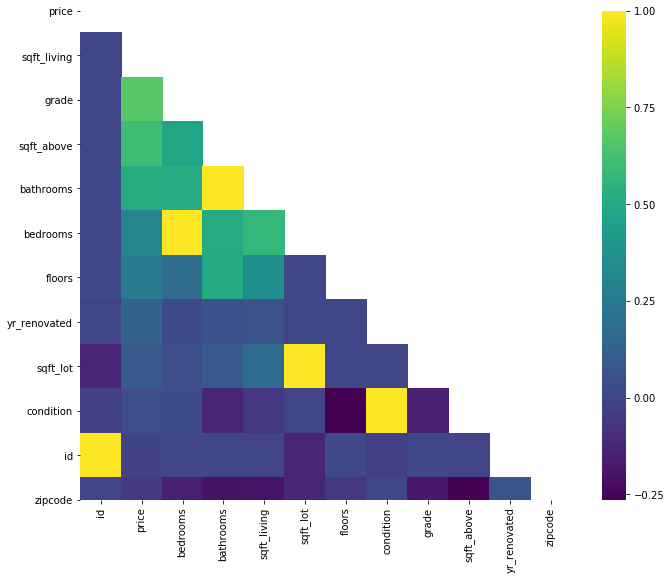

In [12]:
corr = corr.sort_values(by="price", ascending = False)
mask = np.triu(np.ones_like(corr,dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11,9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

In [13]:
#isolating positively correlated with 'price'

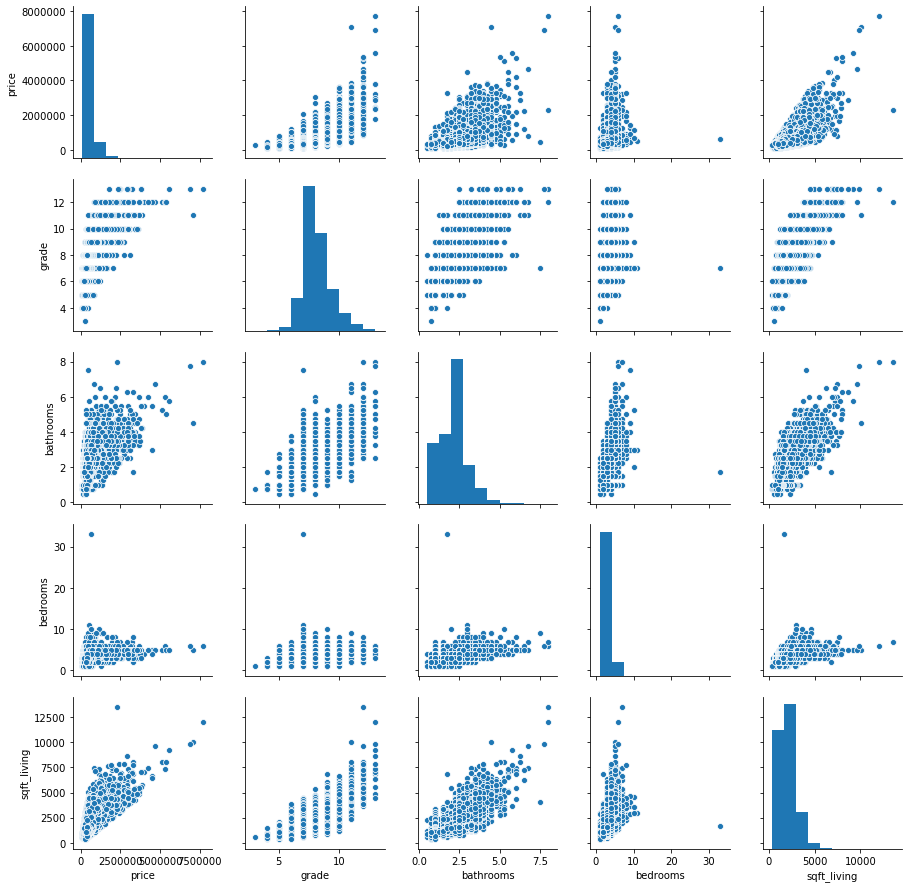

In [14]:
positively_correlated_cols = ['price','grade', 'bathrooms', 'bedrooms', 'sqft_living']
positively_correlated_df = df[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

In [15]:
#sqft_living looks the most normal, however there are outliers that can be dealt with

In [16]:
#check for outliers 

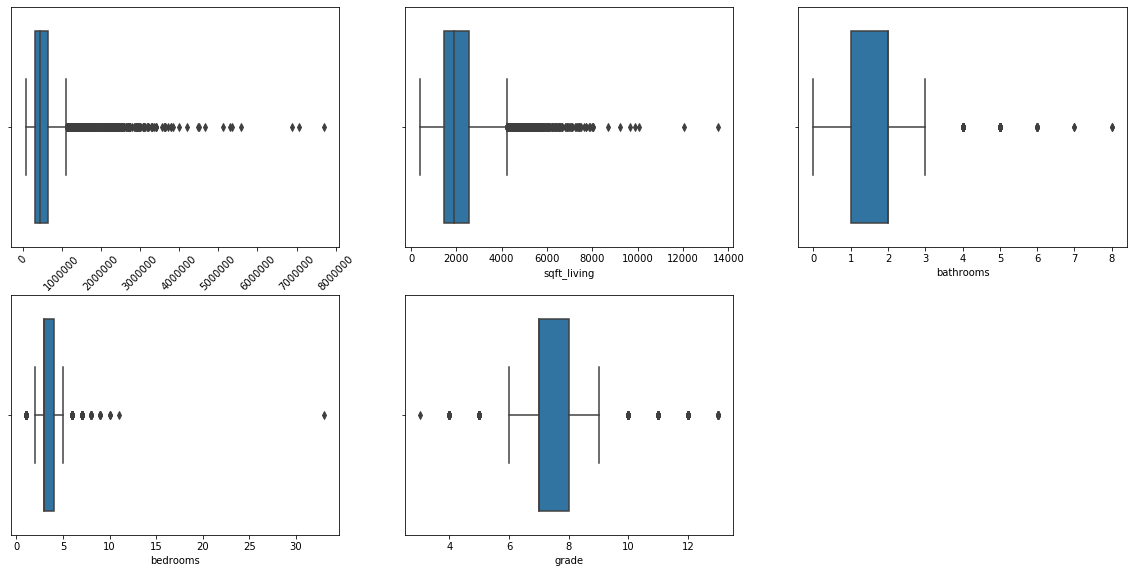

In [17]:
plt.figure(figsize=(20,15))
plt.subplot(331)
sns.boxplot(df.price)
plt.xticks(rotation = 45)
plt.subplot(332)
sns.boxplot(df.sqft_living)
plt.subplot(333)
sns.boxplot(df.bathrooms.astype('int'))
plt.subplot(334)
sns.boxplot(df.bedrooms)
plt.subplot(335)
sns.boxplot(df.grade)



In [18]:
#remove outliers from the df

In [19]:
df = df[df.price < 2000000]
df = df[df.sqft_living < 4000]
df = df[df.bathrooms <= 3]
df = df[df.bedrooms <= 5]
df = df[df.grade < 10]


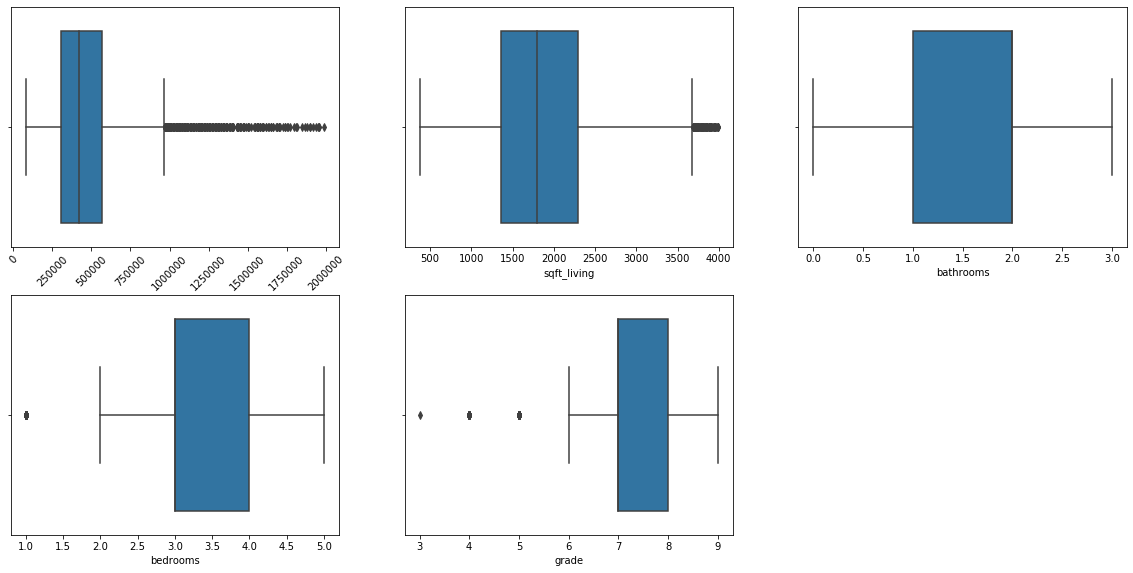

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(331)
sns.boxplot(df.price)
plt.xticks(rotation = 45)
plt.subplot(332)
sns.boxplot(df.sqft_living)
plt.subplot(333)
sns.boxplot(df.bathrooms.astype('int'))
plt.subplot(334)
sns.boxplot(df.bedrooms)
plt.subplot(335)
sns.boxplot(df.grade)

In [21]:
# recheck for normality

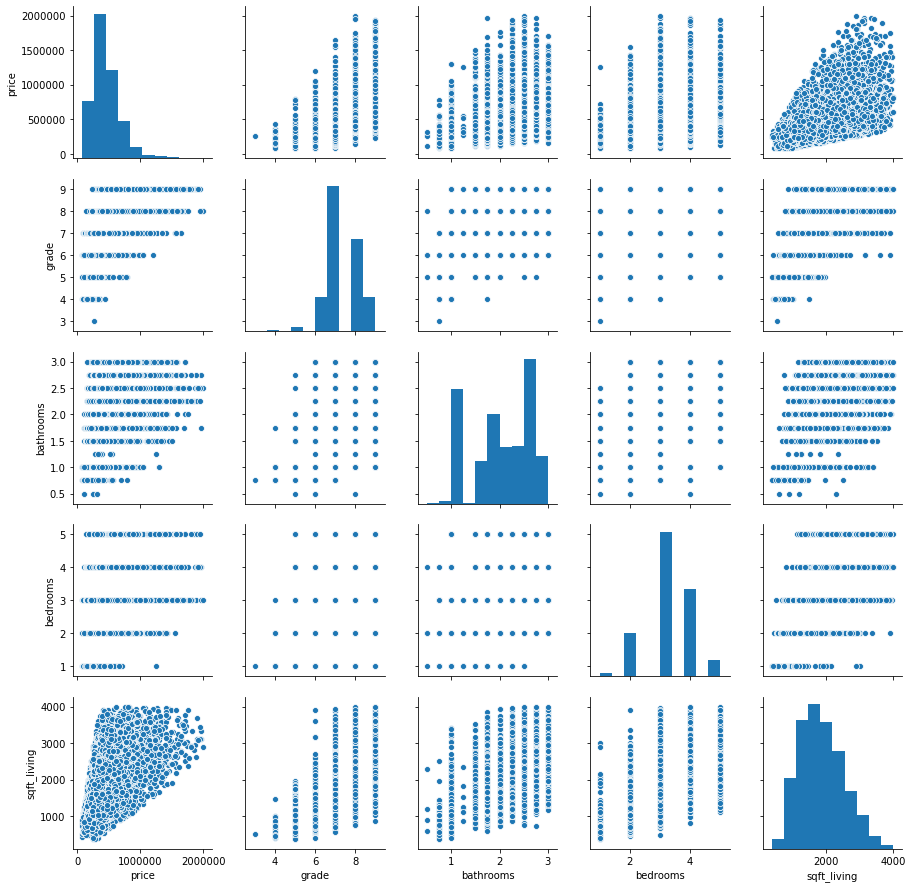

In [22]:
positively_correlated_cols = ['price','grade', 'bathrooms', 'bedrooms', 'sqft_living']
positively_correlated_df = df[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

In [25]:
#Let's fix price to make it just slightly more normal. 

In [26]:
df.price = np.log(df.price)


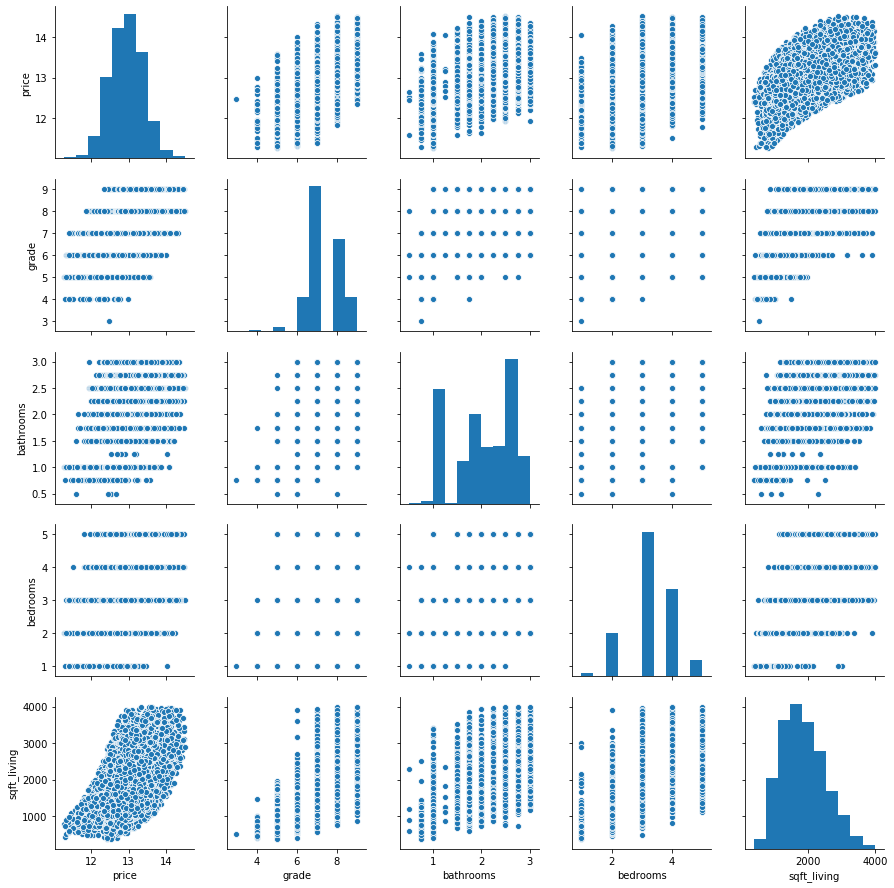

In [27]:
positively_correlated_cols = ['price','grade', 'bathrooms', 'bedrooms', 'sqft_living']
positively_correlated_df = df[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

In [28]:
# Question 3: How much house can you get with your money?
#retest the model with the newly log transformed data 

In [29]:
fsm_df = df[['price', 'sqft_living']].copy()
fsm_df.dropna(inplace=True)

In [30]:
fsm = ols(formula='price ~ sqft_living', data=fsm_df)
fsm_results = fsm.fit()
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     8488.
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        21:38:13   Log-Likelihood:                -7916.8
No. Observations:               18679   AIC:                         1.584e+04
Df Residuals:                   18677   BIC:                         1.585e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2338      0.008   1497.546      0.000      12.218      12.250
sqft_living     0.0004   4.15e-06     92.128      0.000       0.000       0.000
==============================================================================
Omnibus:                       85.718   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.235
Skew:                           0.034   Prob(JB):                     1.13e-14
Kurtosis:                       2.721   Cond. No.                     5.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#For every 1 percent increase in budget, the squarefootage goes up 12.34

In [ ]:
#Testing linearity

In [ ]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results)
print("Rainbow statistic:", rainbow_statistic)
print('Rainbow p-value:' , rainbow_p_value)

In [ ]:
# the p-value is okay but still violates the linearity assumption

In [ ]:
y = fsm_df['price']
y_hat = fsm_results.predict()

In [ ]:
#test for homoscedasticity

In [ ]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel='Predicted Home Price',
        ylabel='Residuals (Predicted - Actual Home Price)')
ax2.scatter(x=y_hat, y=y_hat-y, color='blue', alpha=0.2);

In [ ]:
#The model doesn't visually read as heteroscadistic, however there's still some oddness. 
#time to add more features to get that r-squared up

In [ ]:
model_2_df = df[['sqft_living','price','grade']].copy()
model_2_df.dropna(inplace=True)


In [ ]:
model_2 = ols(formula='price ~ sqft_living + grade', data=model_2_df)
model_2_results = model_2.fit()

In [ ]:
model_2_results.summary()

In [ ]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model_2_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

In [ ]:
#The current model still currently violates the linearity assumption

In [ ]:
#Add a third feature to the model

In [ ]:
model_3_df = df[['sqft_living','price','grade','bathrooms']].copy()
model_3_df.dropna(inplace=True)

In [ ]:
model_3 = ols(formula='price ~ sqft_living + grade + bathrooms', data=model_3_df)
model_3_results = model_3.fit()

In [ ]:
model_3_results.summary()

In [ ]:
# The model is still hasn't changed much, and now the bathrooms are outputting a negative coefficient

In [ ]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model_3_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

In [ ]:
rows = model_3_df[["sqft_living", "grade", "bathrooms"]].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(3)]
vif_df["feature"] = ["sqft_living", "grade", "bathrooms"]

vif_df

In [ ]:
# The VIF being above five is a VERY strong indicator of multicolinearity. 

In [ ]:
# After three models, we can see that there is plenty more to do in order to get the model working correctly.
